**Visualização de Dados**

In [30]:
import pandas as pd

In [33]:
#Leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Salvador.xlsx")

In [34]:
#juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [35]:
#Criando coluna de receita(Vendas * Qtde)
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [36]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [37]:
#Criando a coluna de trimestre
df['trimestre_venda'] = df['Data'].dt.quarter

In [38]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [39]:
df['LojaID'].value_counts(ascending=False)

1036.0    117
1035.0    112
1037.0    101
1034.0     67
983.0      65
982.0      44
1522.0     41
1520.0     39
980.0      36
981.0      31
1005.0     30
1002.0     30
852.0      29
1523.0     29
1004.0     28
854.0      28
853.0      26
1521.0     21
1003.0     20
Name: LojaID, dtype: int64

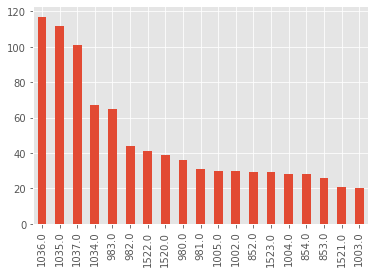

In [41]:
#Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

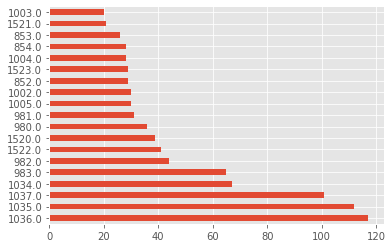

In [42]:
#Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.barh()

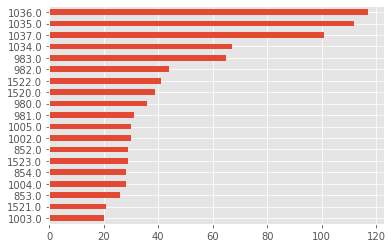

In [43]:
#Gráfico de barras
df['LojaID'].value_counts(ascending=True).plot.barh();

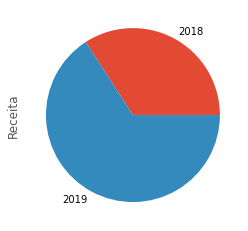

In [44]:
#Gráfico de pizzas
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [45]:
#Total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

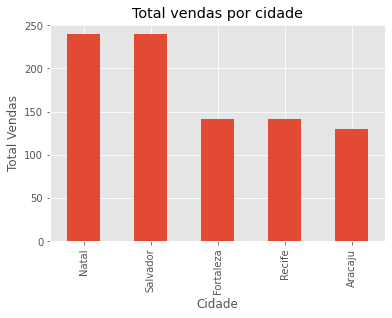

In [46]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

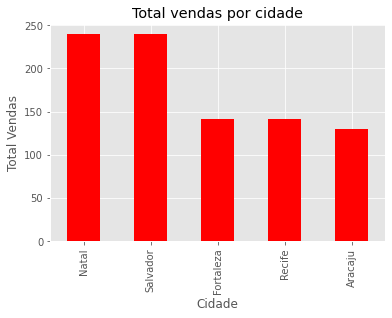

In [52]:
#alterando a cor do gráfico
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');


In [55]:
#alterando o estilo
plt.style.use('ggplot')

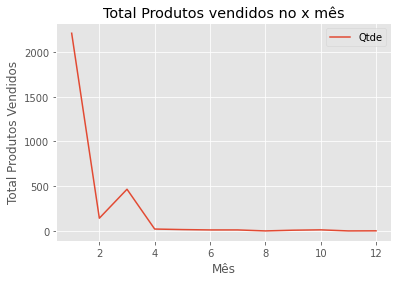

In [58]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = "Total Produtos vendidos no x mês")
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [59]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208.0
2      144.0
3      467.0
4       23.0
5       17.0
6       13.0
7       13.0
8        2.0
9       10.0
10      14.0
11       2.0
12       3.0
Name: Qtde, dtype: float64

In [60]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

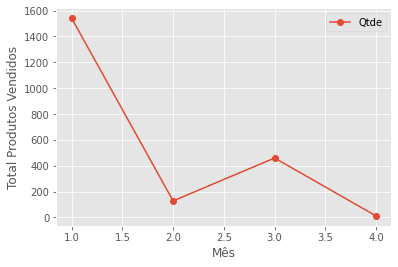

In [63]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

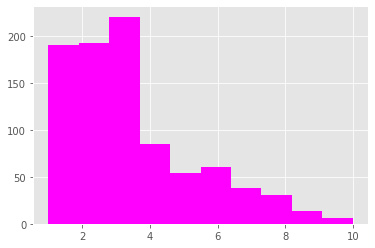

In [65]:
#Hisograma
plt.hist(df['Qtde'], color='magenta');

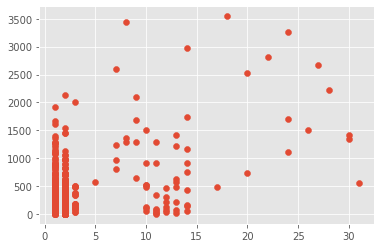

In [67]:
#Grafico de disperção
plt.scatter(x = df_2019['dia_venda'], y = df_2019['Receita'])

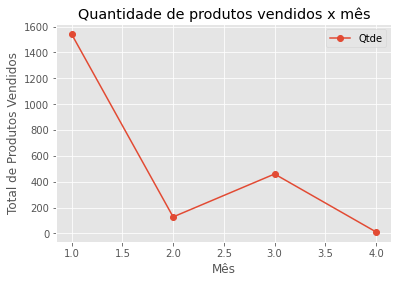

In [69]:
#Salvar em PNG
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos');
plt.legend()
plt.savefig('Gráfico QTDE x Mes.png')